<b> The Sparks Foundation 
    
    
 <br> Author: Lovish Sethi <br>
<br> TSF_Task-1 :  Prediction using Supervised ML
Predict the percentage of an student based on the no. of study hours.

What will be predicted score if a student studies for 9.25 hrs/ day?

I used Python

Dataset: http://bit.ly/w-data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.shape


(25, 2)

In [7]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

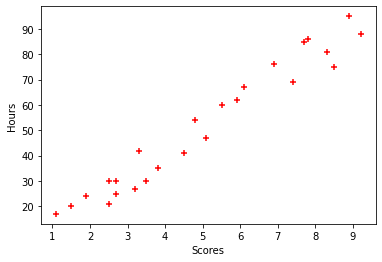

In [10]:
%matplotlib inline
plt.xlabel("Scores")
plt.ylabel("Hours")
plt.scatter(x = df.Hours,y = df.Scores,color = "red",marker = "+")
plt.show()

C:\Users\LOVISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Scores'>

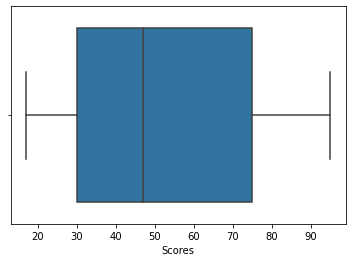

In [11]:
sns.boxplot(df.loc[:,"Scores"])

<b> No outliers are present. Data is clean <br> <br>

Sklearn
Linear Regression Model and Spliting data to training and test

In [12]:
from sklearn.model_selection import train_test_split
#Splitting training and testing data
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values
x_train, x_test, y_train, y_test= train_test_split(x, y,test_size=0.2)

In [13]:
print("X_train size:" ,x_train.size)
x_train

X_train size: 20


array([[4.8],
       [2.5],
       [4.5],
       [8.3],
       [1.9],
       [2.7],
       [2.5],
       [6.1],
       [8.9],
       [7.8],
       [9.2],
       [2.7],
       [1.5],
       [3.3],
       [3.2],
       [8.5],
       [5.9],
       [5.5],
       [3.8],
       [3.5]])

In [14]:
x_test

array([[5.1],
       [7.4],
       [7.7],
       [6.9],
       [1.1]])

<b> Training the model

In [16]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train, y_train)
y_predict= reg.predict(x_test)

<b> For linear regression equation is y = mx+c where

m is slope of the line

x is the independent variable here it is Hours

y is dependent variable here it is Scores

c is the intercept

In [17]:
#slope
reg.coef_


array([9.75308437])

In [18]:
reg.intercept_

2.29877536144852

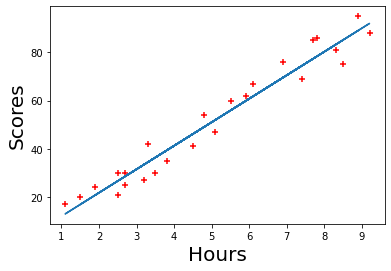

In [19]:
plt.xlabel("Hours", fontsize = 20)
plt.ylabel("Scores", fontsize= 20)
# Plotting the regression line
#  Y = mX + C
line = reg.coef_*x+reg.intercept_
# Plotting for the test data
plt.scatter(x, y, color = "red", marker = "+")
plt.plot(x, line);
plt.show()

<b> Checking the Accuracy 

In [20]:
print("Accuracy of Test Score: ",reg.score(x_test, y_test))
print("Accuracy of Training Score: ",reg.score(x_train, y_train))

Accuracy of Test Score:  0.9428352640442199
Accuracy of Training Score:  0.9539446656610623


 <b> Comparing Actual Values and predictions.

In [21]:
data= pd.DataFrame({'Actual': y_test,'Predicted': y_predict})
data

,Actual,Predicted
0,47,52.039506
1,69,74.471600
2,85,77.397525
3,76,69.595058
4,17,13.027168


In [22]:
print('Score of student who studied for 9.25 hours a data', reg.predict([[9.25]]))

Score of student who studied for 9.25 hours a data [92.51480583]
